<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,27.474483,0.025619,37.500102,37.490426,0.009676
1,0.0,1.0,88.010033,0.060055,98.070088,98.008907,0.061181
2,0.0,2.0,92.475222,-0.020347,102.454875,102.472837,-0.017962
3,0.0,3.0,58.888948,0.016835,68.905783,68.896033,0.009750
4,0.0,4.0,78.182866,0.007939,88.190806,88.184511,0.006295
...,...,...,...,...,...,...,...
59995,999.0,55.0,72.765639,0.015062,82.780701,82.764895,0.015806
59996,999.0,56.0,72.634200,-0.021413,82.612787,82.633450,-0.020663
59997,999.0,57.0,82.353617,-0.030966,92.322651,92.353315,-0.030664
59998,999.0,58.0,89.655838,-0.006882,99.648956,99.655874,-0.006918


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,27.474483,0.025619,37.500102,37.490426,0.009676
1,0.0,1.0,88.010033,0.060055,98.070088,98.008907,0.061181
2,0.0,2.0,92.475222,-0.020347,102.454875,102.472837,-0.017962
3,0.0,3.0,58.888948,0.016835,68.905783,68.896033,0.009750
4,0.0,4.0,78.182866,0.007939,88.190806,88.184511,0.006295
...,...,...,...,...,...,...,...
59995,999.0,55.0,72.765639,0.015062,82.780701,82.764895,0.015806
59996,999.0,56.0,72.634200,-0.021413,82.612787,82.633450,-0.020663
59997,999.0,57.0,82.353617,-0.030966,92.322651,92.353315,-0.030664
59998,999.0,58.0,89.655838,-0.006882,99.648956,99.655874,-0.006918


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,27.474483,0.025619,37.500102,37.490426,0.009676
1,0.0,1.0,88.010033,0.060055,98.070088,98.008907,0.061181
2,0.0,2.0,92.475222,-0.020347,102.454875,102.472837,-0.017962
3,0.0,3.0,58.888948,0.016835,68.905783,68.896033,0.009750
4,0.0,4.0,78.182866,0.007939,88.190806,88.184511,0.006295
...,...,...,...,...,...,...,...
59995,999.0,55.0,72.765639,0.015062,82.780701,82.764895,0.015806
59996,999.0,56.0,72.634200,-0.021413,82.612787,82.633450,-0.020663
59997,999.0,57.0,82.353617,-0.030966,92.322651,92.353315,-0.030664
59998,999.0,58.0,89.655838,-0.006882,99.648956,99.655874,-0.006918


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

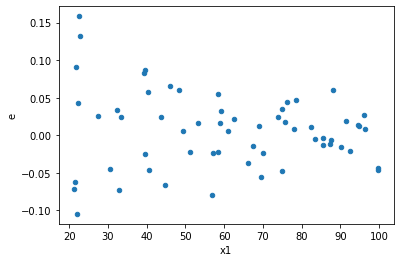

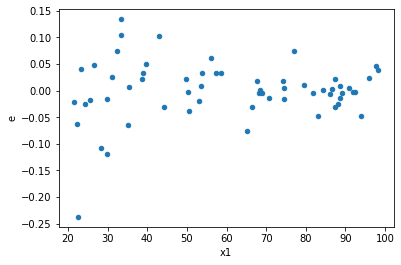

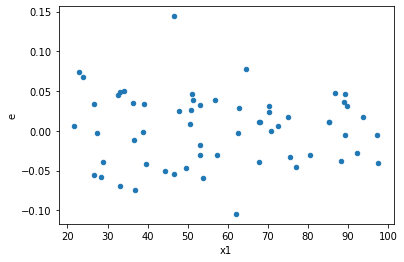

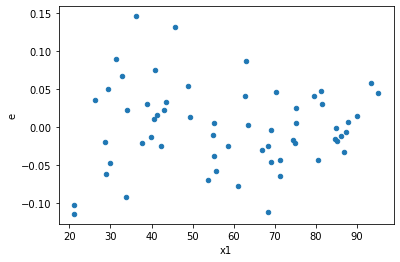

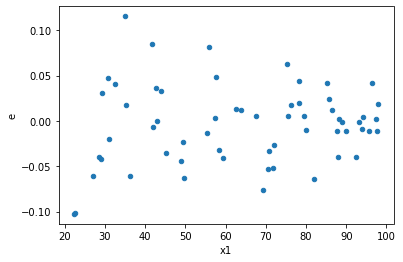

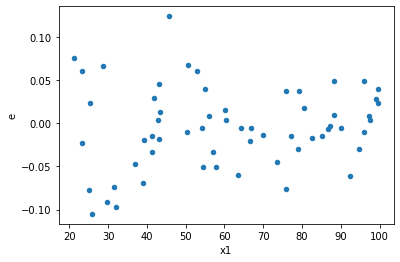

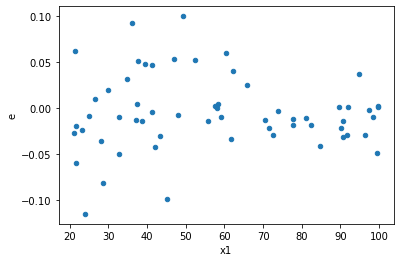

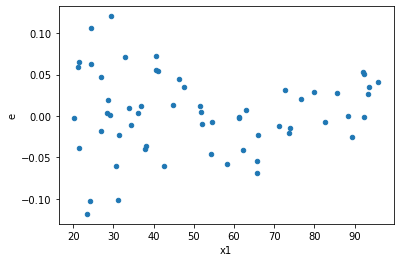

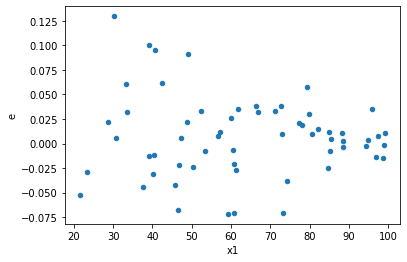

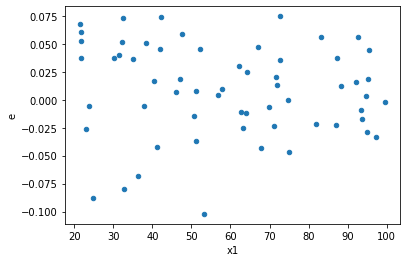

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.10987622694366499,0.017769399454406743,0.004777227258420217,0.0007725825849742062,0.161721966149396,4.6820029295817314e-05,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.13569876242366993,0.017556815397736642,0.005899946192333475,0.0007633397999015931,0.12938080704761246,6.5018490658896435e-06,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,0.06934861537573135,0.02375096344608143,0.0030151571902491893,0.001032650584612236,0.34248648393913156,0.012950549260908297,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,0.07929350064905011,0.021982296662067725,0.0034475435064804396,0.0009557520287855533,0.27722696667612773,0.003193489090845065,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.06809019618614293,0.015045193482484195,0.002960443312440997,0.0006541388470645302,0.22095976109914706,0.0005999220380279155,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,0.08348353824798371,0.022217637085607055,0.0036297190542601615,0.0009659842211133502,0.26613195309967175,0.002392845929785138,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.04728048872938313,0.010506181859561143,0.0020556734230166578,0.00045679051563309313,0.22220967130214808,0.0006266254264036702,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,0.08792981490739078,0.014880149259373192,0.003823035430756121,0.0006469630112770953,0.16922757400371222,6.89418376027199e-05,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,0.06497221460237139,0.014556752770873333,0.002824878895755278,0.0006329022943857971,0.22404581496814227,0.0006676126903569556,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    753
Reject001=1 : Homoscedasticity      247
Name: Result_test, dtype: int64